In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [13]:
# Parameters
L = 50  # Lattice size
agent_types = 2  # Number of agent types (excluding vacancies)
tolerance = 0.3  # Tolerance level for satisfaction
vacancy_density = 0.1  # Percentage of vacancies
aging_factor = 0.1  # Factor for aging effect

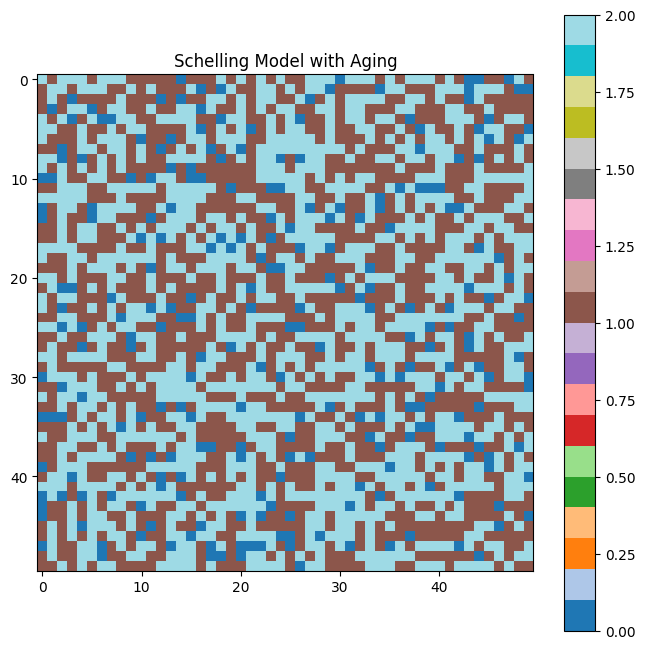

In [14]:
# Create the lattice with agents and vacancies
def initialize_grid(L, agent_types, vacancy_density):
    grid_size = L * L
    num_vacancies = int(grid_size * vacancy_density)
    num_agents = grid_size - num_vacancies

    # Create a list of agents and vacancies
    agents = np.array([i % agent_types + 1 for i in range(num_agents)] + [0]*num_vacancies)
    np.random.shuffle(agents)

    # Reshape into a grid
    grid = agents.reshape((L, L))
    return grid

# Display the grid
def plot_grid(grid, title="Schelling Model with Aging"):
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap='tab20', interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Initialize and plot the initial grid
grid = initialize_grid(L, agent_types, vacancy_density)
plot_grid(grid)


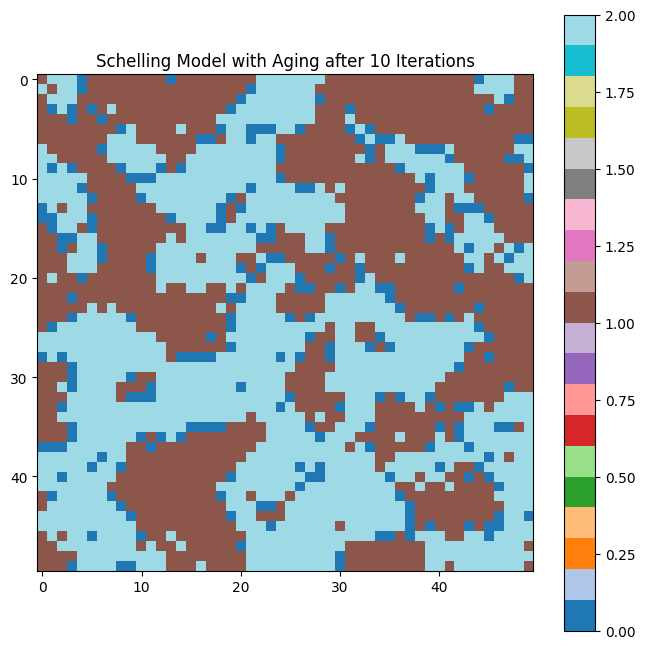

In [15]:
def is_satisfied(x, y, grid, tolerance):
    """
    Determine if the agent at position (x, y) is satisfied.
    An agent is satisfied if the fraction of neighboring agents of a different type 
    is less than the tolerance level.
    """
    agent_type = grid[x, y]
    if agent_type == 0:
        return True  # Vacancies are always satisfied

    # Get the neighborhood
    neighborhood = grid[max(x-1, 0):min(x+2, L), max(y-1, 0):min(y+2, L)]
    different_type = (neighborhood != agent_type) & (neighborhood != 0)

    # Calculate satisfaction
    if different_type.size == 0:
        return True  # Avoid division by zero
    satisfaction = different_type.sum() / float(different_type.size)
    return satisfaction <= tolerance

def find_vacancy(grid):
    """
    Find a random vacancy in the grid.
    """
    vacant_positions = np.argwhere(grid == 0)
    if len(vacant_positions) == 0:
        return None  # No vacancies available
    return vacant_positions[random.randint(0, len(vacant_positions) - 1)]

def update_grid(grid, aging_grid, tolerance, aging_factor):
    """
    Perform one iteration of the grid update. Agents may move if they are unsatisfied.
    Aging is incorporated by reducing the probability of moving for satisfied agents.
    """
    L = grid.shape[0]
    for _ in range(L*L):
        # Pick a random agent
        x, y = random.randint(0, L-1), random.randint(0, L-1)
        if grid[x, y] == 0:
            continue  # Skip vacancies

        satisfied = is_satisfied(x, y, grid, tolerance)
        aging_grid[x, y] += 1  # Increase the aging count

        if not satisfied or random.random() < aging_factor / (aging_grid[x, y] + 1):
            # Find a vacancy and move the agent
            vacancy = find_vacancy(grid)
            if vacancy is not None:
                grid[vacancy[0], vacancy[1]], grid[x, y] = grid[x, y], 0
                aging_grid[vacancy[0], vacancy[1]], aging_grid[x, y] = aging_grid[x, y], 0

    return grid, aging_grid

# Initialize the aging grid
aging_grid = np.zeros((L, L), dtype=int)

# Run the simulation for a few iterations and display the grid
num_iterations = 10
for _ in range(num_iterations):
    grid, aging_grid = update_grid(grid, aging_grid, tolerance, aging_factor)

plot_grid(grid, title=f"Schelling Model with Aging after {num_iterations} Iterations")


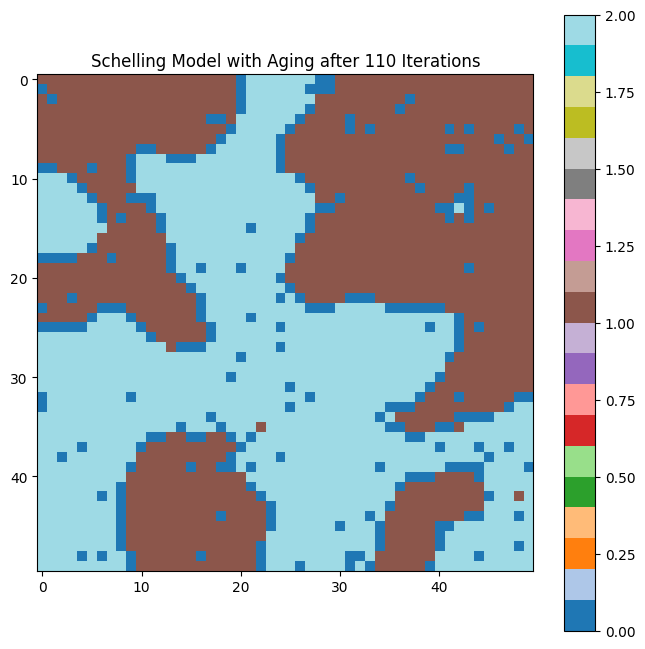

0.9968888888888889

In [16]:
def calculate_segregation_index(grid):
    """
    Calculate the segregation index, which measures the degree of segregation in the grid.
    It is calculated as the average satisfaction level across all agents.
    """
    satisfaction_levels = []
    for x in range(L):
        for y in range(L):
            if grid[x, y] != 0:  # Exclude vacancies
                satisfaction = is_satisfied(x, y, grid, tolerance)
                satisfaction_levels.append(int(satisfaction))

    if len(satisfaction_levels) == 0:
        return 0
    return sum(satisfaction_levels) / len(satisfaction_levels)

# Run the simulation for additional iterations and calculate segregation index
additional_iterations = 100
for _ in range(additional_iterations):
    grid, aging_grid = update_grid(grid, aging_grid, tolerance, aging_factor)

# Calculate and display the segregation index
segregation_index = calculate_segregation_index(grid)
plot_grid(grid, title=f"Schelling Model with Aging after {num_iterations + additional_iterations} Iterations")
segregation_index
